In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("./dataset.tsv", sep="\t", header=0)
data = data.replace(np.nan, "", regex=True)
data = data.astype({
    "order_id" : "int64", 
    "quantity": "int64", 
    "item_name": "category",
    })

def plot_histogram(data_to_display: dict, title: str):
    plt.barh(range(len(data_to_display)), data_to_display.values())
    plt.yticks(range(len(data_to_display)), list(data_to_display.keys()))
    plt.title(label=title)


#### 1. Вывести: кол-во наблюдений в датасете

In [2]:
print(len(data.index), end="\n\n")

4622



#### 2. Вывести названия столбцов

In [3]:
names = ", ".join(list(data.keys()))
print(names, end="\n\n")

order_id, quantity, item_name, choice_description, item_price



#### 3. Определить самую частую позицию (item) в заказе 

In [4]:
print(data["item_name"].mode(), end="\n\n")

0    Chicken Bowl
Name: item_name, dtype: category
Categories (50, object): ['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', ..., 'Veggie Crispy Tacos', 'Veggie Salad', 'Veggie Salad Bowl', 'Veggie Soft Tacos']



#### 4. Построить гистрограмму частоты заказов по позициям (item)

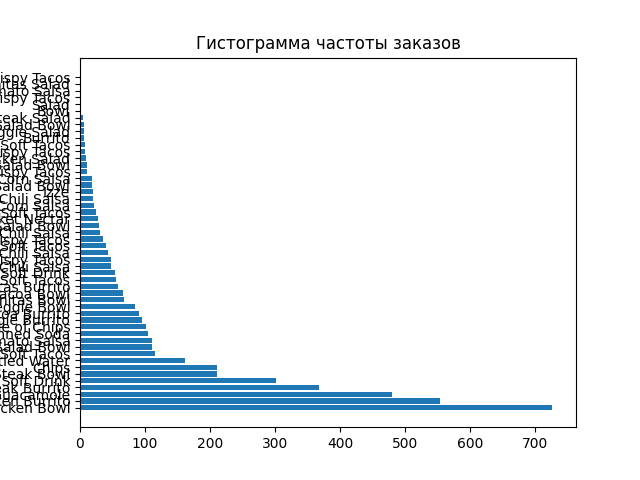

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

def plot_histogram(data_to_display: dict, title: str):
    plt.barh(range(len(data_to_display)), list(data_to_display.values()))
    plt.yticks(range(len(data_to_display)), list(data_to_display.keys()))
    plt.title(label=title)

data_to_display = data["item_name"].value_counts().to_dict()

plot_histogram(data_to_display, "Гистограмма частоты заказов")

#### 5. Измените тип переменной item_price c с помощью лямбда функции

In [6]:
try:
    data["item_price"] = data["item_price"].apply(lambda x: float(x[1:])).astype("float64")
except:
    print("Item prices are already float")

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

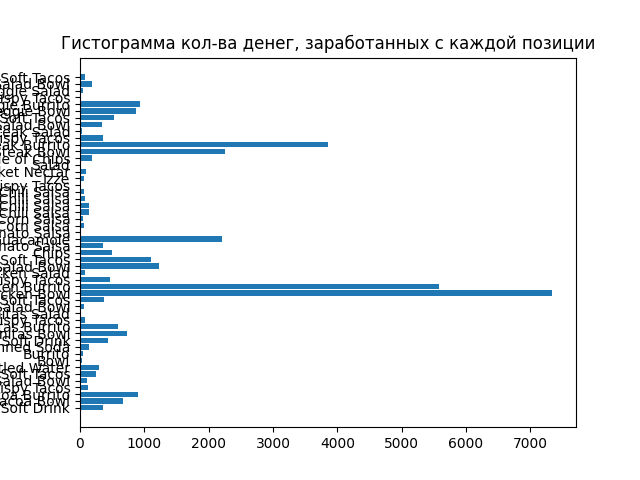

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

def plot_histogram(data_to_display: dict, title: str):
    plt.barh(range(len(data_to_display)), list(data_to_display.values()))
    plt.yticks(range(len(data_to_display)), list(data_to_display.keys()))
    plt.title(label=title)

data_to_display = data.groupby(by=["item_name"])["item_price"].sum().to_dict()
plot_histogram(data_to_display, "Гистограмма кол-ва денег, заработанных с каждой позиции")

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [8]:
print(data.groupby("order_id")["item_price"].sum().mean())
print(data["item_price"].sum() / data.groupby("order_id").ngroups)

18.811428571428568
18.811428571428575


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [9]:
mean = data["item_price"].mean()
min = data["item_price"].min()
max = data["item_price"].max()
median = data["item_price"].median()
print(f"Среднее значение: ${mean}")
print(f"Минимальное значение: ${min}")
print(f"Максимальное значение: ${max}")
print(f"Медиана: ${median}")

Среднее значение: $7.464335785374297
Минимальное значение: $1.09
Максимальное значение: $44.25
Медиана: $8.75


#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [15]:
steak_data = data[data["item_name"].str.contains("Steak")]

print(steak_data.groupby("item_name").agg({"quantity" : np.sum}))
print("По остроте")
print("Mild: ", steak_data[steak_data["choice_description"].str.contains("Salsa \(Mild\)", na=False)].quantity.sum())
print("Medium: ", steak_data[steak_data["choice_description"].str.contains("Salsa \(Medium\)", na=False)].quantity.sum())
print("Hot: ", steak_data[steak_data["choice_description"].str.contains("Salsa \(Hot\)", na=False)].quantity.sum())

                                       quantity
item_name                                      
6 Pack Soft Drink                             0
Barbacoa Bowl                                 0
Barbacoa Burrito                              0
Barbacoa Crispy Tacos                         0
Barbacoa Salad Bowl                           0
Barbacoa Soft Tacos                           0
Bottled Water                                 0
Bowl                                          0
Burrito                                       0
Canned Soda                                   0
Canned Soft Drink                             0
Carnitas Bowl                                 0
Carnitas Burrito                              0
Carnitas Crispy Tacos                         0
Carnitas Salad                                0
Carnitas Salad Bowl                           0
Carnitas Soft Tacos                           0
Chicken Bowl                                  0
Chicken Burrito                         

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [11]:
from forex_python.converter import CurrencyRates

rate = CurrencyRates().get_rate("USD", "RUB")
data["item_price_ru"] = data["item_price"].apply(lambda x: x * rate)

#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [12]:
print(data.groupby("item_name")["item_price"].mean())

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 


#### 12. Определить цену по каждой позиции в отдельности. 

In [13]:
data["price"] = data["item_price"] / data["quantity"]